In [4]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 9.3 MB/s eta 0:00:00m eta 0:00:01m0:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.6/268.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.4 MB/s eta 0:00:00m eta 0:00:010:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [36]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [161]:
# b. Load training and testing data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [25]:
a = pd.read_csv("/Users/prathamesh/Downloads/mnist_train.csv")
aa = pd.read_csv("/Users/prathamesh/Downloads/mnist_test.csv")

y_train = a['label'].values
x_train = a.drop('label', axis=1).values

y_test = aa['label'].values
x_test = aa.drop('label', axis=1).values

# Convert pixel values to numpy arrays and reshape
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

# Normalize (optional but recommended for neural networks)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Check the shape
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_train.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (60000,)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

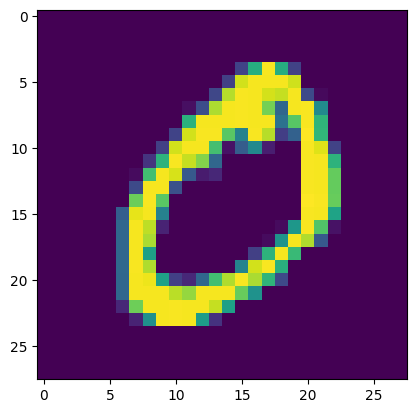

In [26]:
# Normalize pixel values (0-255) to (0-1)
print(x_train[1])
print(y_train[1])
plt.imshow(x_train[1])
# x_train = x_train / 255.0
# x_test = x_test / 255.0


In [40]:
# c. Define the network architecture using Keras
model = Sequential([
    Input(shape=(28,28,1)),
    Flatten(),    # convert 2D image into vector
    Dense(128, activation='relu'),    # hidden layer
    Dense(64, activation='relu'),     # hidden layer
    Dense(10, activation='softmax')   # output layer (10 digit classes)
])


In [41]:
# Using SGD optimizer
optimizer = SGD(learning_rate=0.01) # SGD = Stochastic Gradient Descent

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # sparse categorical cross entropy



# ✅ Why sparse_categorical_crossentropy?

# Because:

# We have multiple classes (0–9 digits)

# Labels are integers like 2, 5, 9

# If labels were one-hot (vectors), we’d use categorical_crossentropy.

# Example:

# sparse: 2

# categorical: [0,0,1,0,0,0,0,0,0,0]

# Sparse is simpler for MNIST.

In [42]:
# d. Train the model using SGD with 11 epochs
history = model.fit(x_train, y_train, epochs=3,validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8406 - loss: 0.6083 - val_accuracy: 0.9151 - val_loss: 0.3104
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9179 - loss: 0.2879 - val_accuracy: 0.9302 - val_loss: 0.2464
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9317 - loss: 0.2372 - val_accuracy: 0.9363 - val_loss: 0.2206


In [43]:
# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9363 - loss: 0.2206
Test Loss: 0.22058843076229095
Test Accuracy: 0.9362999796867371


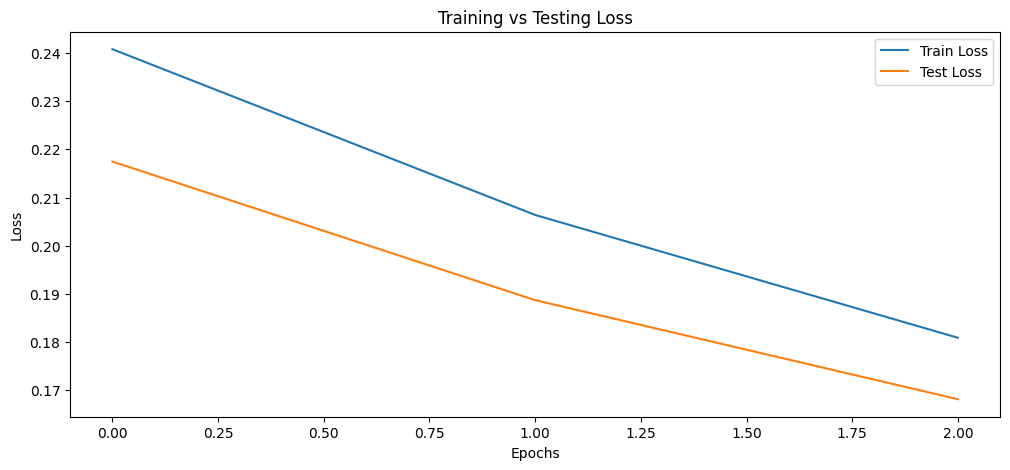

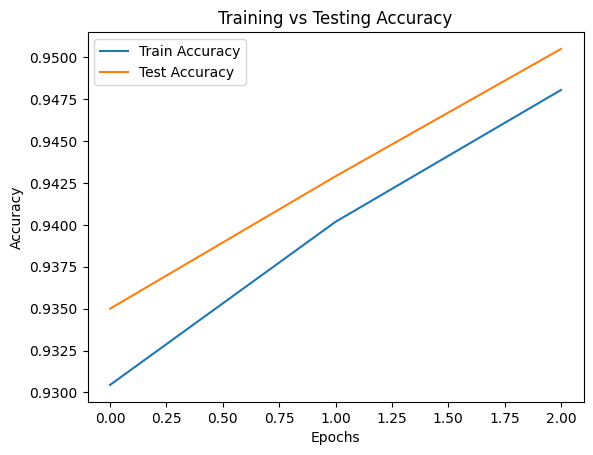

In [177]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12,5))

# Plot Loss
# plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Training vs Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy
# plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Training vs Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


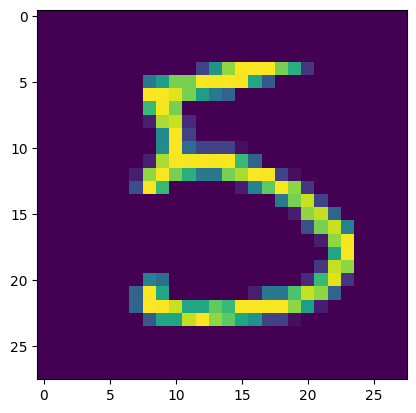

5


In [35]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15]))

In [91]:
model.summary()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_27 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,388 (427.30 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)